In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from utils01 import ReadXVGs
from utils01 import GROParser

In [2]:
groparser = GROParser("input/solv_ions_prot.gro", 1.0)
N_ATOMS = groparser.n_atoms
ATOM_ALIGN = groparser.atom_align

In [3]:
MASS = {'CA': 12.01100, 'C': 12.01100, 'O': 15.99900, 'N': 14.00700}
weights = np.array([MASS[atom] for atom in ATOM_ALIGN])

In [4]:
ETA = 3 * N_ATOMS
BOLTZ = 1.380649 * (0.1*23)

In [5]:
fp = "remote-workspace/04-simulate/trj.npy"
trj_pred = np.load(fp)[:100]

fp = "input/xvg/2fs/MainChain-coord.xvg"
trj = ReadXVGs(None, None, None)._read_xvg(fp)[:100].compute()

fp = "workspace/04-simulate/trj.npy"
trj_pred2 = np.load(fp)[:100]

In [6]:
def cal_T(trj, alphas=np.ones((trj.shape[0]-1))):
    veloc = trj[1:] - trj[:-1]
    veloc = veloc / 0.002
    veloc = veloc * np.tile(alphas, (3, N_ATOMS, 1)).transpose(2, 1, 0)
    veloc_square = np.sum(np.square(veloc), axis=2)
    KE = np.sum(np.multiply(veloc_square, weights), axis=1) / 2
#     T = KE * (2 / ETA / BOLTZ)
#     return T
    return KE

In [7]:
Ts_pred = cal_T(trj_pred)
Ts = cal_T(trj)
Ts_pred2 = cal_T(trj_pred2)

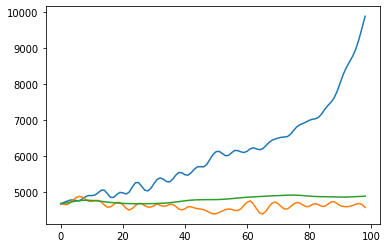

In [8]:
plt.plot(Ts_pred)
plt.plot(Ts)
plt.plot(Ts_pred2)